In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 800)
plt.rcParams['figure.figsize'] = [15, 15]

In [23]:
tweets = pd.read_csv('data/raw/Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [24]:
tweets['text'].head(-50)

0                                                                                                           @VirginAmerica What @dhepburn said.
1                                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                       @VirginAmerica and it's a really big bad thing about it
                                                                          ...                                                                  
14585                                                            @AmericanAir no hold times, just disconnections.   There is no excuse f

# countplots

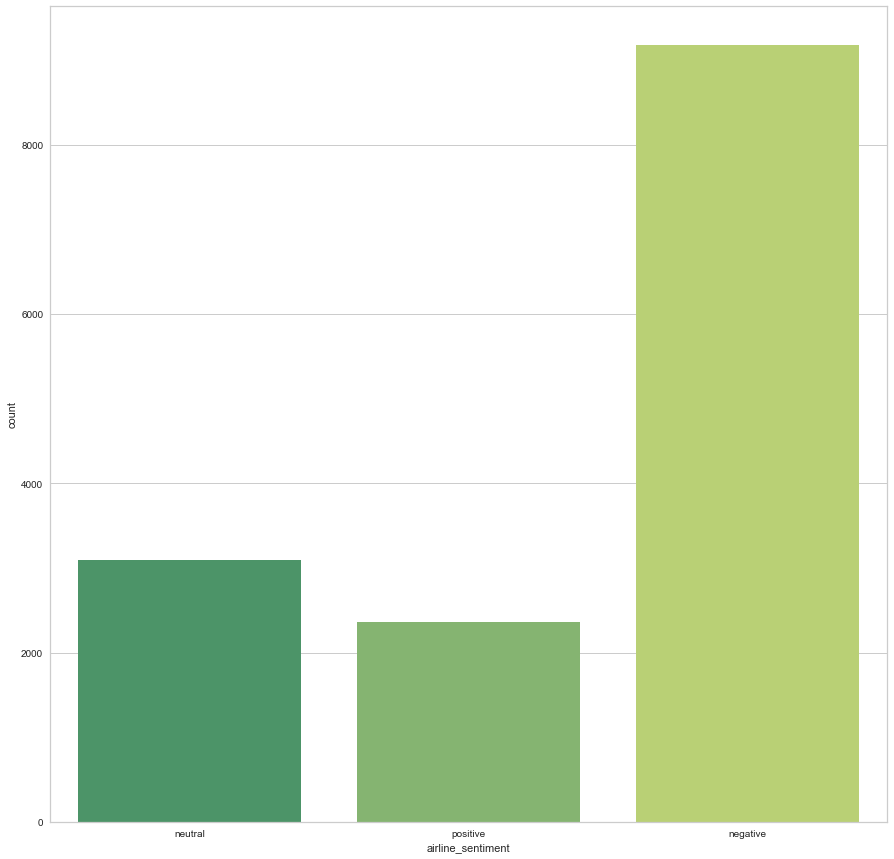

In [25]:
sns.countplot('airline_sentiment', data=tweets, palette='summer')  

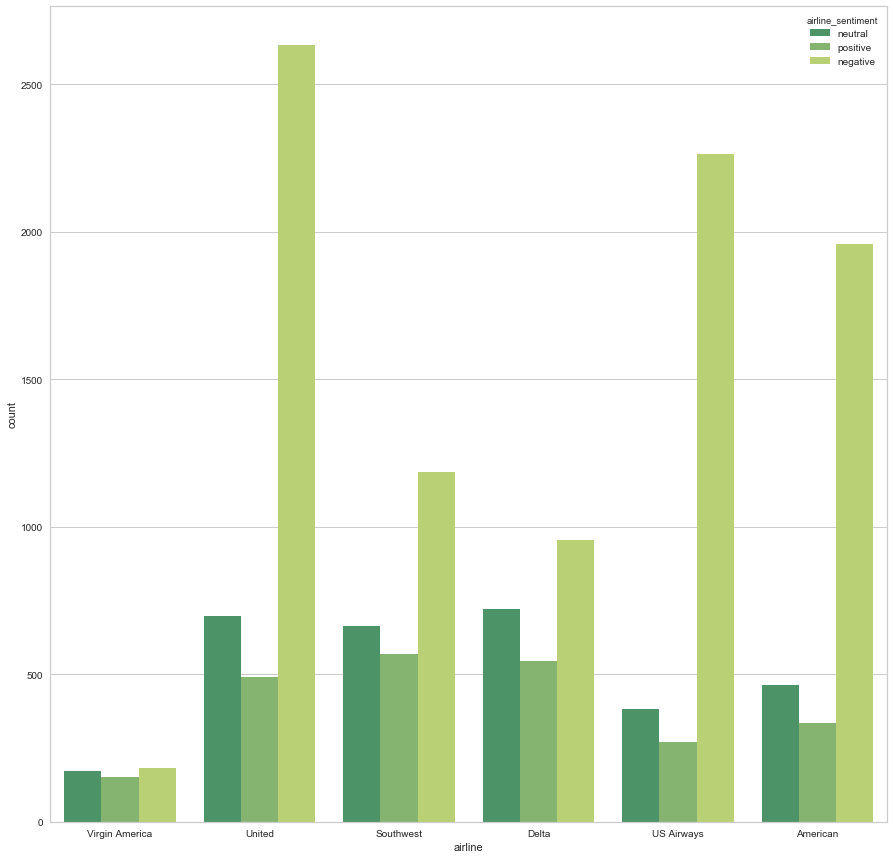

In [26]:
sns.countplot('airline', hue='airline_sentiment', data=tweets, palette='summer')

In [27]:
tweets_per_airline = tweets.groupby('airline')['text'].count().sort_values()
tweets_per_airline

airline
Virgin America     504
Delta             2222
Southwest         2420
American          2759
US Airways        2913
United            3822
Name: text, dtype: int64

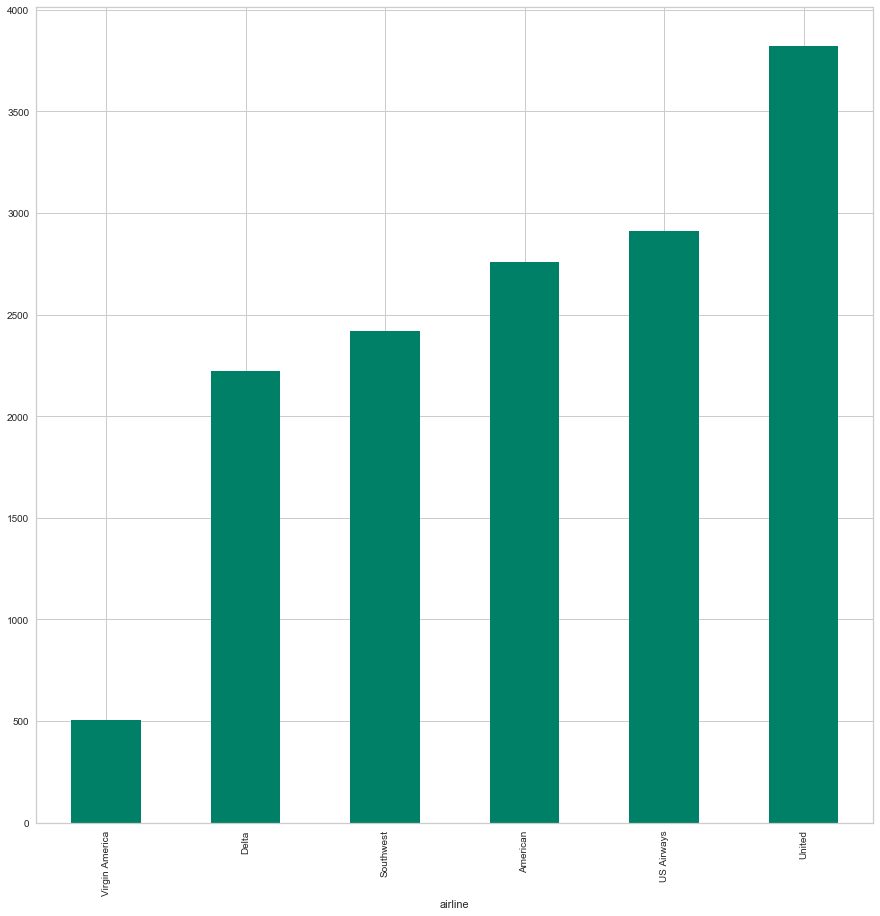

In [28]:
tweets_per_airline.plot(kind='bar', colormap='summer')

In [29]:
tweets['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [30]:
tweets_neg_reason = tweets.groupby('negativereason')['text'].count().sort_values()  # write labeling functions acc to negative reasons and positive reasons 
tweets_neg_reason

negativereason
Damaged Luggage                  74
longlines                       178
Flight Attendant Complaints     481
Flight Booking Problems         529
Bad Flight                      580
Lost Luggage                    724
Cancelled Flight                847
Can't Tell                     1190
Late Flight                    1665
Customer Service Issue         2910
Name: text, dtype: int64

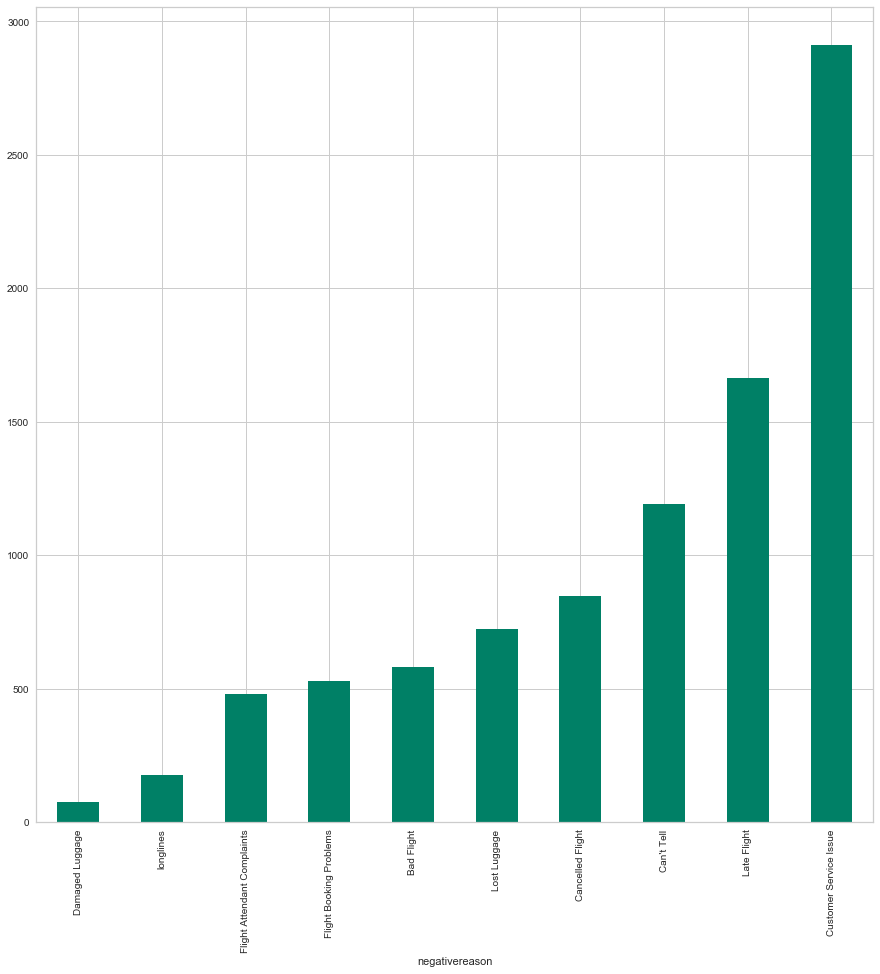

In [31]:
tweets_neg_reason.plot(kind='bar', colormap='summer')

# summary statistics of sentences

In [32]:
tweets.groupby('airline_sentiment').apply(lambda x: len(x))

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64

In [12]:
def func(x):
    return len(x.split(' '))

tweets[tweets['airline_sentiment']=='negative']['text'].apply(func).describe()

count    9178.000000
mean       19.844520
std         5.997104
min         2.000000
25%        16.000000
50%        21.000000
75%        24.000000
max        36.000000
Name: text, dtype: float64

In [13]:
tweets[tweets['airline_sentiment']=='positive']['text'].apply(func).describe()

count    2363.000000
mean       14.138383
std         7.108085
min         2.000000
25%         8.000000
50%        14.000000
75%        20.000000
max        31.000000
Name: text, dtype: float64

In [14]:
tweets[tweets['airline_sentiment']=='neutral']['text'].apply(func).describe()

count    3099.000000
mean       14.515650
std         7.023248
min         2.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        32.000000
Name: text, dtype: float64

# Frequency Distributions

In [15]:
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import DispersionPlot
from yellowbrick.text import PosTagVisualizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
# add stopwords to out-of-the-box list
# https://www.scikit-yb.org/en/latest/api/text/freqdist-3.py
from sklearn.feature_extraction import text

airline_stop_words = ['united', 'usairways', 'southwestair', 'americanair', 'jetblue', 'virginamerica', 'flight']
custom_stop_words = text.ENGLISH_STOP_WORDS.union(airline_stop_words)

In [64]:
vectorizer = CountVectorizer(stop_words=custom_stop_words)
docs = vectorizer.fit_transform(tweets['text'])
features = vectorizer.get_feature_names()

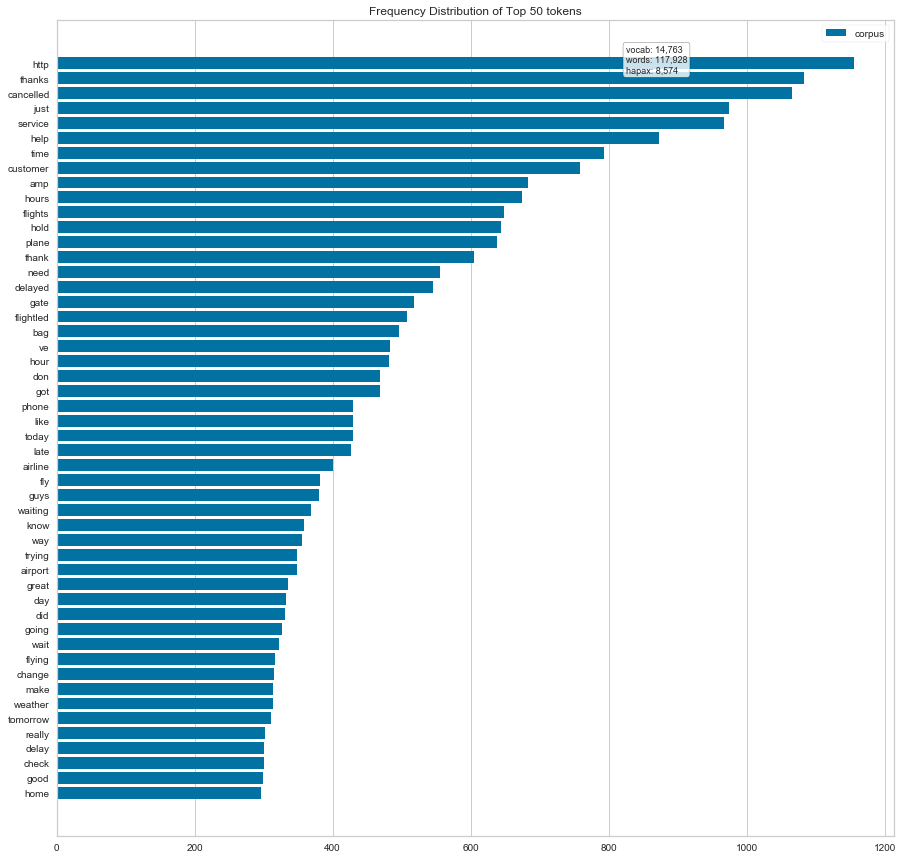

In [65]:
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

In [66]:
# https://www.scikit-yb.org/en/latest/api/text/freqdist-3.py
from collections import defaultdict
airlines = defaultdict(list)
for text, label in zip(tweets['text'], tweets['airline_sentiment']):
  airlines[label].append(text)

In [67]:
vectorize = CountVectorizer(stop_words=custom_stop_words)
docs = vectorizer.fit_transform(text for text in airlines['positive'])
features = vectorizer.get_feature_names()

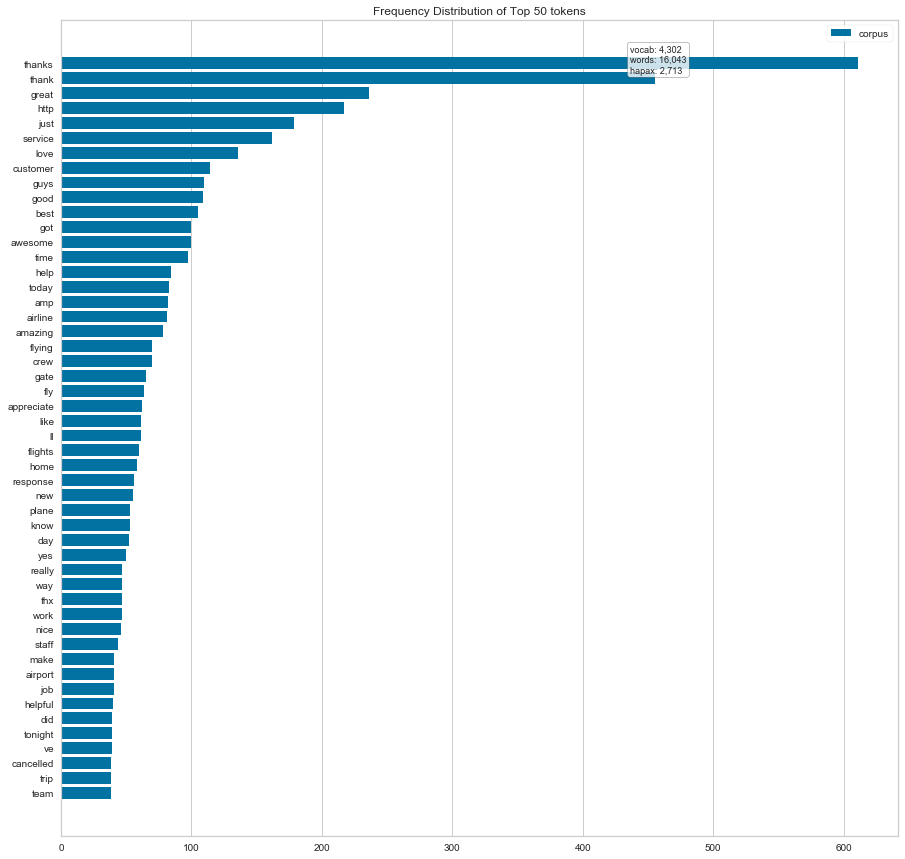

In [68]:
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

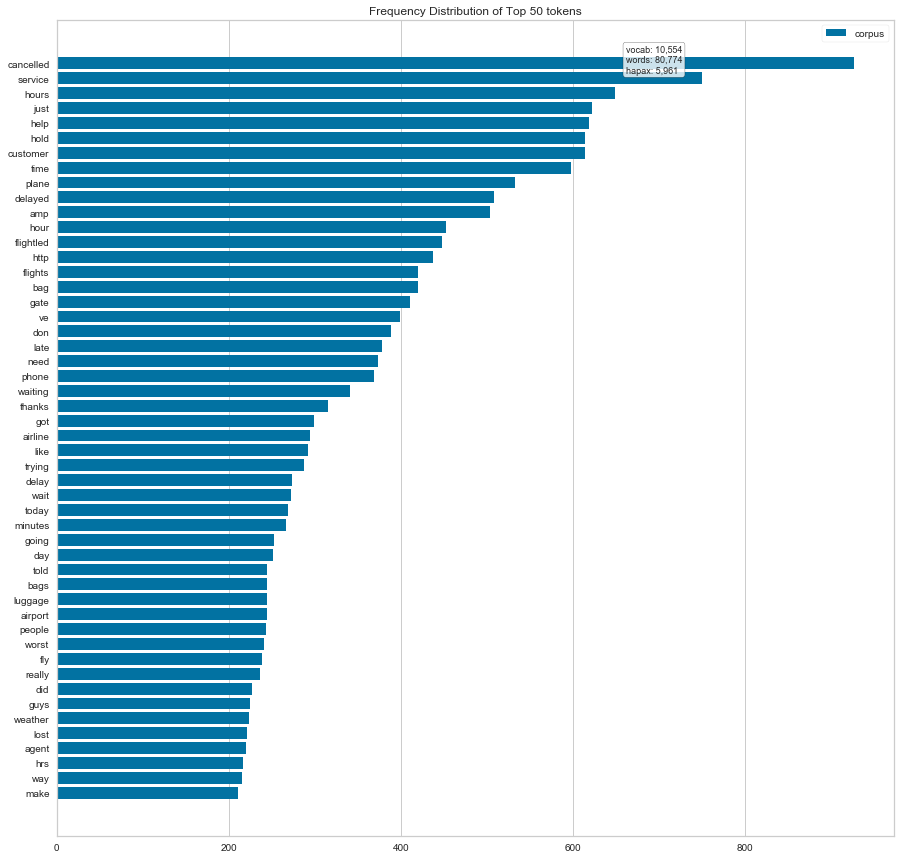

In [69]:
vectorize = CountVectorizer(stop_words=custom_stop_words)
docs = vectorizer.fit_transform(text for text in airlines['negative'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

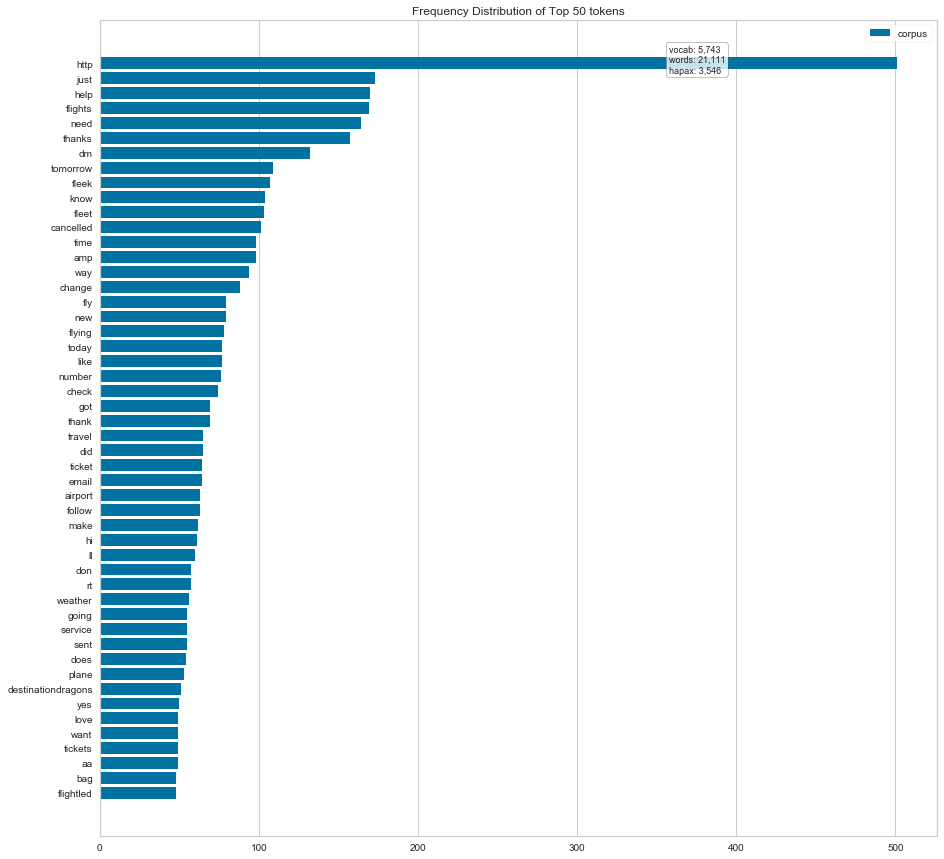

In [70]:
vectorize = CountVectorizer(stop_words=custom_stop_words)
docs = vectorizer.fit_transform(text for text in airlines['neutral'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

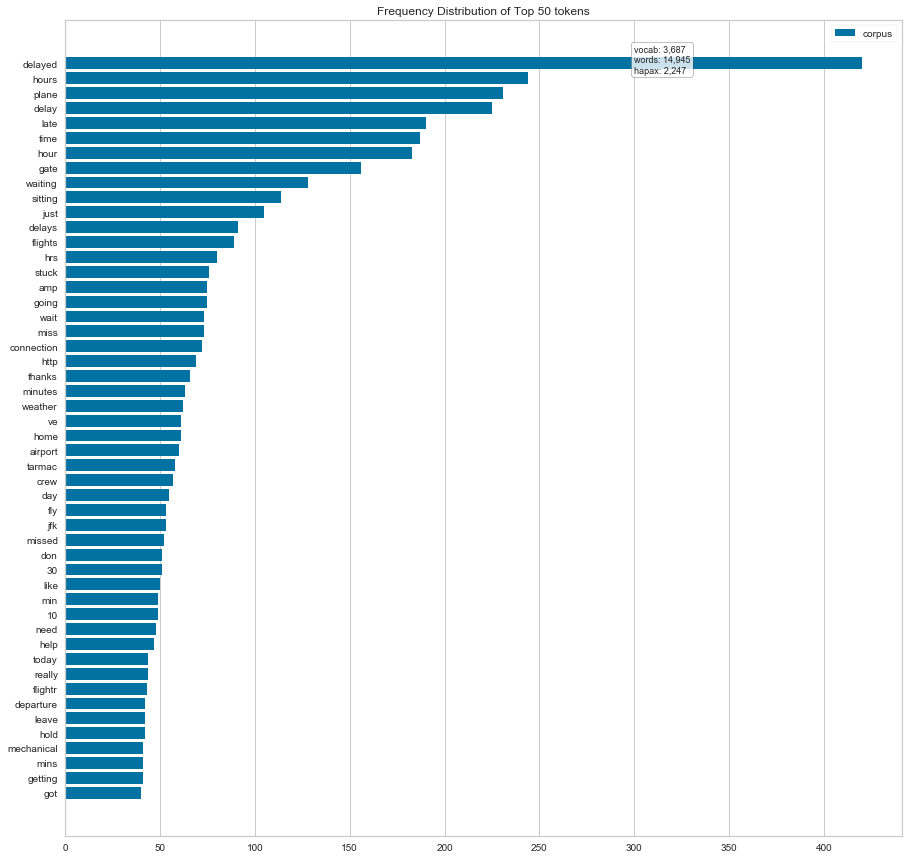

In [71]:
from collections import defaultdict
airlines = defaultdict(list)
for text, label in zip(tweets['text'], tweets['negativereason']):
  airlines[label].append(text)
vectorize = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(text for text in airlines['Late Flight'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=custom_stop_words)
X = tfidf.fit_transform(tweets['text'])
y = tweets['airline_sentiment']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


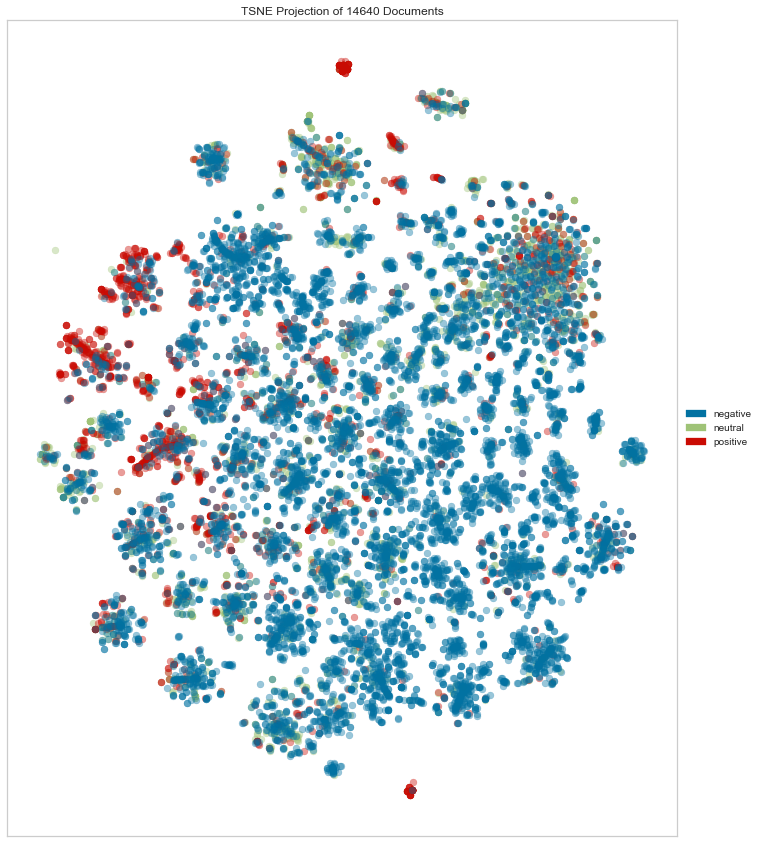

In [100]:
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


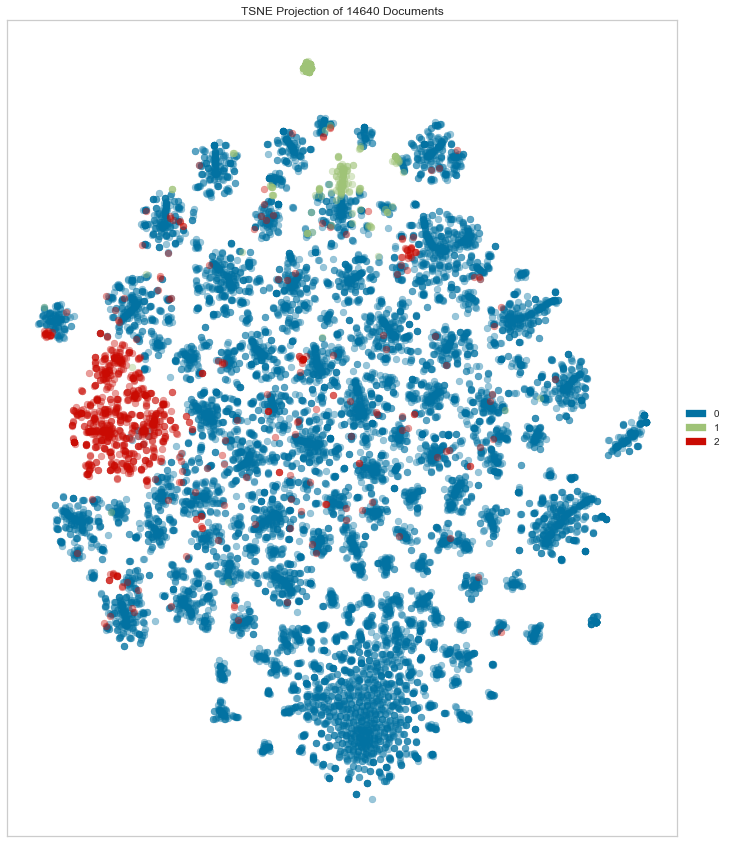

In [101]:
# unsupervised clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y = kmeans.labels_
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show()

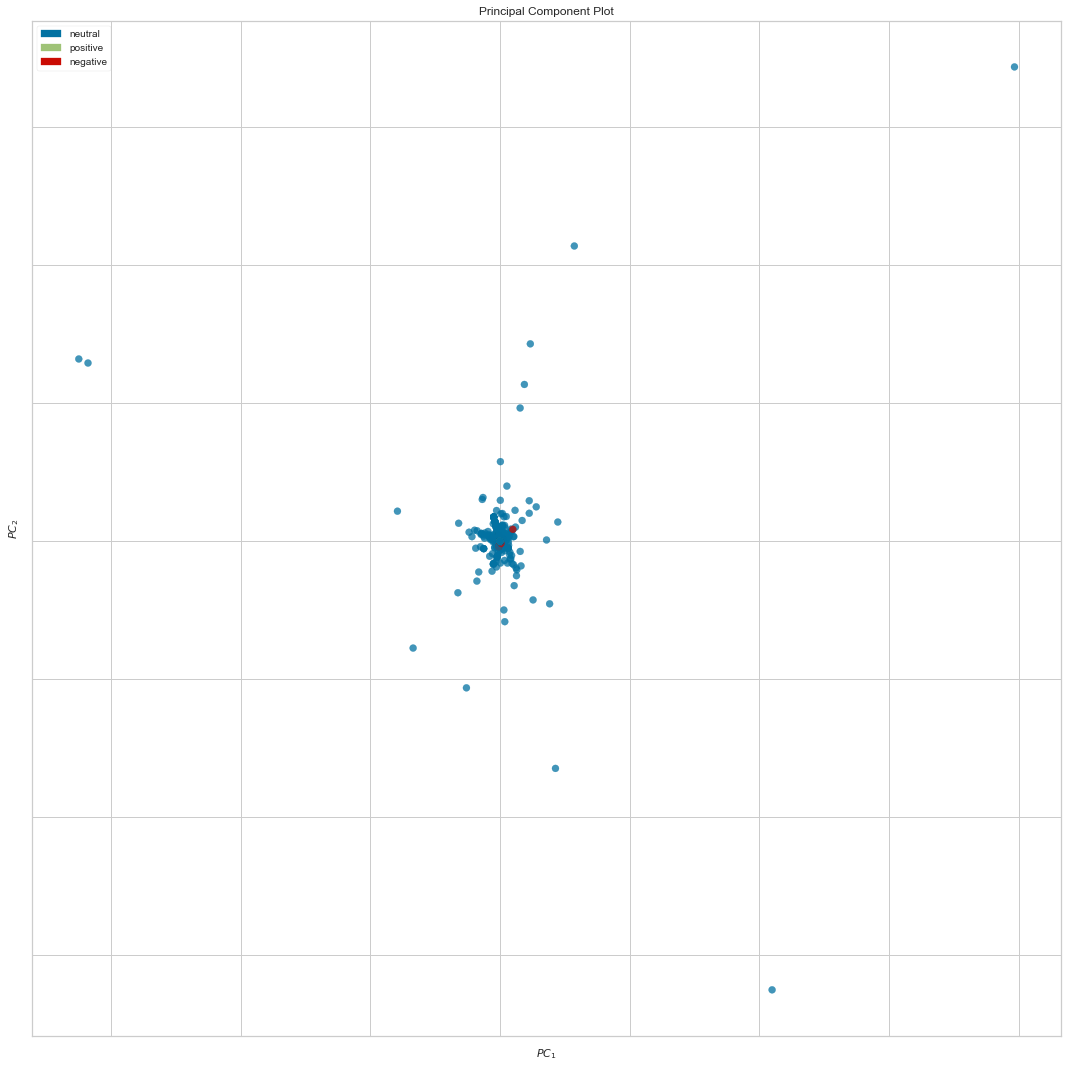

In [102]:
from yellowbrick.features import PCA
from sklearn import preprocessing
X_preproc = preprocessing.scale(X.toarray()) # for more info see here:http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html
classes = tweets['airline_sentiment'].unique()
visualizer = PCA(projection = 2, classes=classes)
visualizer.fit_transform(X_preproc,y)
visualizer.show()

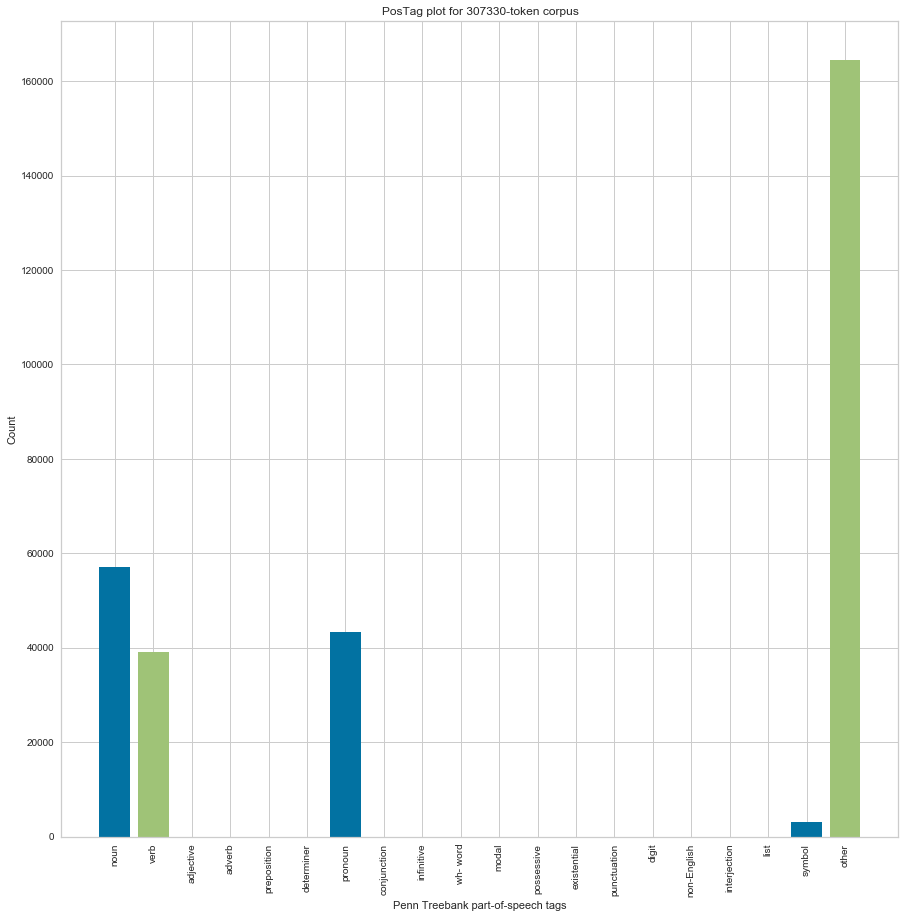

In [84]:
from yellowbrick.text import PosTagVisualizer
viz = PosTagVisualizer(parser='spacy')
viz.fit(tweets['text'].values.tolist())
viz.show()

# concordance and bigram analysis